### CogTom - a computational implementation of the Theory of Mind model.  

The objective of this software program is to evaluate a false belief task in the "Sally-Anne test" as described in the figure below.

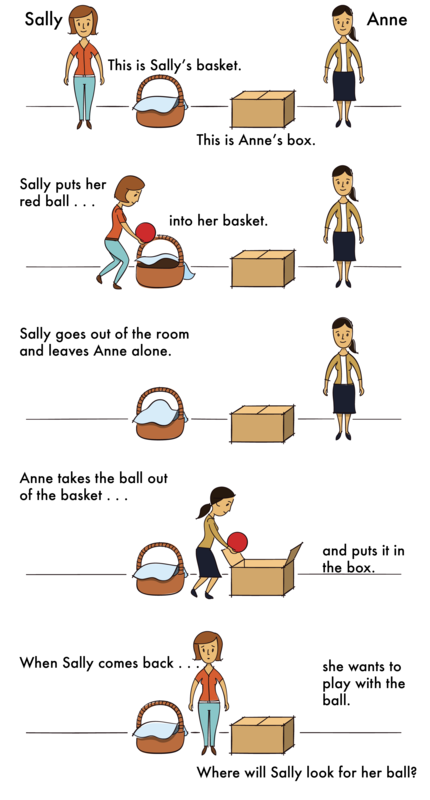

In [1]:
from IPython.display import Image
Image('ToM test.png')

Input data for this computational system is defined by text files simulating camera systems and mental subsystems.

#### entities.txt:  
This file simulates a camera input identifying a scene.  
The camera system identifies:  
- a list of entities in the scene.  
- if the entity is an agent.  
The column t specifies the time step for the camera information.  

In [2]:
import pandas as pd
entities_df = pd.read_csv('input/entities.txt',
                          delim_whitespace=True,
                          comment='#')
print(entities_df.head(20).to_string(index=False))

 t  Entity  Is_Agent
 1   Sally      True
 1    Anne      True
 1  Basket     False
 1     Box     False
 1    Ball     False
 2   Sally      True
 2    Anne      True
 2  Basket     False
 2     Box     False
 2    Ball     False
 3   Sally      True
 3    Anne      True
 3  Basket     False
 3     Box     False
 3    Ball     False
 4    Anne      True
 4  Basket     False
 4     Box     False
 5    Anne      True
 5  Basket     False


#### eyedirection.txt
This file simulates a visual system capable of identifying eye direction.
The information is provided in the form
t Agent Object where:
t is the simulation time step
Agent is agent name
Object is the entity the agent is looking at.

In [3]:
import pandas as pd
eye_dir_df = pd.read_csv('input/eye_directions.txt',
                         delim_whitespace=True,
                         comment='#')
print(eye_dir_df.head(20).to_string(index=False))

 t  Agent  Object
 1  Sally    Anne
 1  Sally  Basket
 1  Sally     Box
 1  Sally    Ball
 1   Anne   Sally
 1   Anne  Basket
 1   Anne     Box
 1   Anne    Ball
 2  Sally    Anne
 2  Sally  Basket
 2  Sally     Box
 2  Sally    Ball
 2   Anne   Sally
 2   Anne    Ball
 2   Anne  Basket
 2   Anne     Box
 3  Sally    Anne
 3  Sally  Basket
 3  Sally     Box
 3  Sally    Ball


#### affordances.txt:  
Affordances are an entity's properties that show the possible actions users can take with it.</br>
For example, a Box may contain other objects, and a Ball may be hidden.</br>
Affordances, for the purpose of this system, are immutable properties during the simulation timeline.

In [4]:
import pandas as pd
afford_df = pd.read_csv('input/affordances.txt',
                        delim_whitespace=True,
                        comment='#')
print(afford_df.to_string(index=False))

 Object Affordance
    Box   Contains
 Basket   Contains
   Ball      Hides
   Anne     Exists
  Sally     Exists


#### intentions.txt:
This file simulates a camera input identifying a scene.
The camera system identifies the intention of an agent
based on movement and posture information in the scene.
The column t specifies the time step for the camera information.

In [5]:
import pandas as pd
intention_df = pd.read_csv('input/intentions.txt',
                           delim_whitespace=True,
                           comment='#')
print(intention_df.to_string(index=False))

 t  Agent Intention  Object  Target
 1  Sally      None    None    None
 1   Anne      None    None    None
 2  Sally  ReachFor    Ball    None
 2   Anne      None    None    None
 3  Sally      Puts    Ball  Basket
 3   Anne      None    None    None
 4  Sally     Exits    None    None
 4   Anne      None    None    None
 5   Anne  ReachFor  Basket    None
 6   Anne      Gets    Ball  Basket
 7   Anne      Puts    Ball     Box
 8   Anne     Exits    None    None
 8  Sally    Enters    None    None
 9  Sally    Search    Ball    None


The simulation has been split to mind steps according to the detection of intentions in the environment. Each of the mind steps has been documented to file scenes.txt:

In [6]:
import pandas as pd
scene_df = pd.read_csv('input/scenes.txt',
                       sep = ':',
                       comment = '#')
print(scene_df.to_string(index=False))

 t                                              Scene
 1  Sally and Anne are in the room. Basket, box an...
 2                       Sally reaches for the ball. 
 3                 Sally puts the ball in the basket.
 4                              Sally exits the room.
 5                       Anne reaches for the basket.
 6                Anne gets the ball from the basket.
 7                     Anne puts the ball in the box.
 8             Anne exits the room, and Sally enters.
 9           Sally searches for the ball in the room.


#### System execution
Pleae see below for the system executing step-by-step the simulation.

In [7]:
%run cogtom.py

CogTom - a computational implementation of the Theory of Mind model

Starting simulation. Mind Steps = 9
Hello, I am CogTom.

This is the list of commands I understand.
To ask me about people: 'p'
To ask me about objects: 'o'
To go to the next mind step: 'enter'
To quit the simulation: 'q'

This is mind step 1.
Scene 1: Sally and Anne are in the room. Basket, box and ball are on the floor.
Enter command: p
About what person you want to know about?
{'Anne', 'Sally'}
Sally

Sally Believes Anne Exists
Sally Believes Ball Hides
Sally Believes Basket Contains
Sally Believes Box Contains

Enter command: 

This is mind step 2.
Scene 2: Sally reaches for the ball. 
Enter command: p
About what person you want to know about?
{'Anne', 'Sally'}
Anne

Anne Believes Ball OnHand Of Sally
Anne Believes Basket Contains
Anne Believes Box Contains
Anne Believes Sally Exists

Enter command: 

This is mind step 3.
Scene 3: Sally puts the ball in the basket.
Enter command: p
About what person you want to kn